# Classical simphonies
## An Exploratory Data Analysis and Modeling
### Data scraped from Spotify

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 

In [2]:
# Read data from CSV file
df = pd.read_csv("classical.csv")

In [3]:
# Remove everything after the first comma in the 'Artists' column
df['Artists'] = df['Artists'].str.split(',').str[0]

In [4]:
# Converting Release Date (Object Dtype) column to datetime Dtype
df['Release Date'] = pd.to_datetime(df['Release Date'], format='mixed')

# Extract numerical features from datetime columns
df['Release Day'] = df['Release Date'].dt.day
df['Release Month'] = df['Release Date'].dt.month
df['Release Year'] = df['Release Date'].dt.year

# milliseconds into minutes
df['duration_minutes'] = df['duration_ms'] / 60000

#Removing duration_ms column
df.drop(columns=['duration_ms'], inplace=True)

In [5]:
df_sorted = df.sort_values(by='Popularity Score', ascending=False)

# Drop duplicates in the 'Name' column, keeping the first occurrence (highest popularity score)
df_unique = df_sorted.drop_duplicates(subset='Name', keep='first')

# Reset index to ensure the DataFrame index is sequential
df_unique = df_unique.reset_index(drop=True)

# Display the resulting DataFrame without duplicate 'Name' entries
print(df_unique)

                                                  Name  \
0    Cello Suite No. 1 in G Major, BWV 1007: I. Pré...   
1                                 I. Allegro non molto   
2    Vivaldi: The Four Seasons, Violin Concerto in ...   
3    The Four Seasons, Violin Concerto No. 2 in G M...   
4                  Mozart: Fantasia in D Minor, K. 397   
..                                                 ...   
201  Symphony No. 9 in D Minor, Op. 125 "Choral": I...   
202  Symphony No. 6 in F Major, Op. 68 "Pastoral": ...   
203                  Die Zauberflöte, K. 620: Overture   
204               Le nozze di Figaro, K. 492: Overture   
205  Clarinet Quintet in A Major, K. 581: 2. Larghetto   

                     Artists                                          Album  \
0      Johann Sebastian Bach  Bach: Unaccompanied Cello Suites (Remastered)   
1            Antonio Vivaldi                      Vivaldi: The Four Seasons   
2            Antonio Vivaldi                      Vivaldi: The Fou

In [6]:
# Rename column 'Popularity Score' to 'popularity' so it matches my audio features by just having single words on columns
df_unique = df_unique.rename(columns={'Popularity Score': 'popularity'})

# Display the DataFrame with the renamed column
print("\nDataFrame with Renamed Column:")
print(df_unique)


DataFrame with Renamed Column:
                                                  Name  \
0    Cello Suite No. 1 in G Major, BWV 1007: I. Pré...   
1                                 I. Allegro non molto   
2    Vivaldi: The Four Seasons, Violin Concerto in ...   
3    The Four Seasons, Violin Concerto No. 2 in G M...   
4                  Mozart: Fantasia in D Minor, K. 397   
..                                                 ...   
201  Symphony No. 9 in D Minor, Op. 125 "Choral": I...   
202  Symphony No. 6 in F Major, Op. 68 "Pastoral": ...   
203                  Die Zauberflöte, K. 620: Overture   
204               Le nozze di Figaro, K. 492: Overture   
205  Clarinet Quintet in A Major, K. 581: 2. Larghetto   

                     Artists                                          Album  \
0      Johann Sebastian Bach  Bach: Unaccompanied Cello Suites (Remastered)   
1            Antonio Vivaldi                      Vivaldi: The Four Seasons   
2            Antonio Vivaldi      

In [7]:
# Checking averages on my numerical colums
mean_values_of_features = df_unique.groupby('Artists')[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                 'speechiness', 'acousticness', 'instrumentalness',
                                                 'liveness', 'valence', 'tempo', 'duration_minutes',
                                                 'time_signature', 'Release Day', 'Release Month',
                                                 'Release Year']].mean()
print(mean_values_of_features)

                         popularity  danceability    energy       key  \
Artists                                                                 
Antonio Vivaldi           43.793103      0.339966  0.213562  5.103448   
Johann Sebastian Bach     35.444444      0.267039  0.095425  3.000000   
Ludwig van Beethoven       1.901235      0.286085  0.107332  4.037037   
Wolfgang Amadeus Mozart   20.466667      0.323655  0.172060  4.600000   

                          loudness      mode  speechiness  acousticness  \
Artists                                                                   
Antonio Vivaldi         -19.329069  0.517241     0.047145      0.867172   
Johann Sebastian Bach   -24.203778  0.694444     0.047894      0.952056   
Ludwig van Beethoven    -22.171136  0.827160     0.046438      0.938914   
Wolfgang Amadeus Mozart -18.388100  0.850000     0.044182      0.968050   

                         instrumentalness  liveness   valence       tempo  \
Artists                          

In [8]:
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats

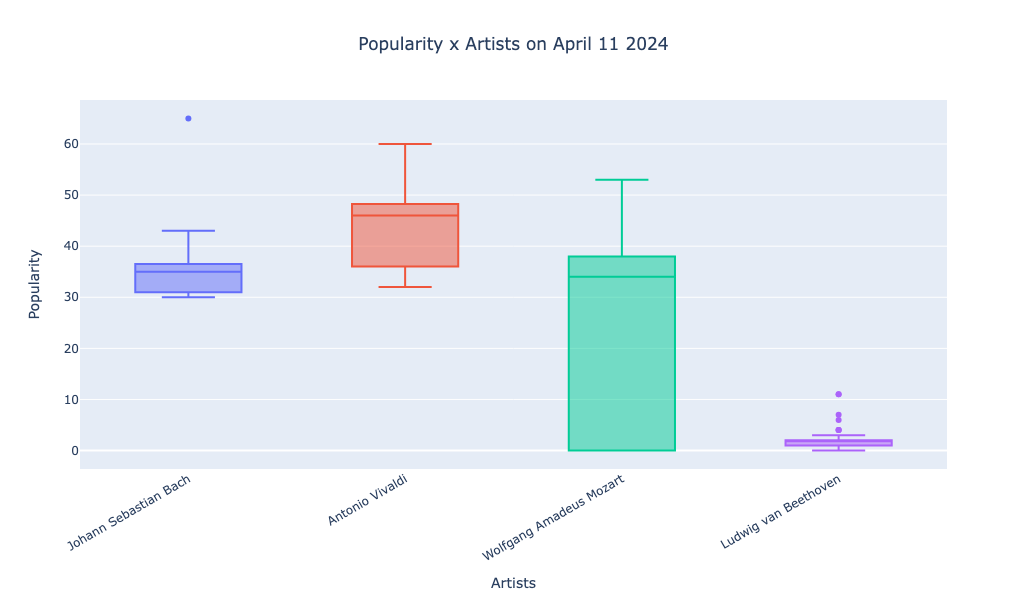

In [9]:
# Box plot
box_plot = px.box(df_unique, x='Artists', y='popularity', color='Artists',
                  title='Popularity x Artists on April 11 2024',
                  labels={'Artists': 'Artists', 'popularity': 'Popularity'}) # second is the label

# Update layout
box_plot.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(df_unique['Artists'].unique()))),
        ticktext=list(df_unique['Artists'].unique())
    )
)

# Show the box plot
box_plot.show()

In [10]:
# Adding new column named, Genre
df_unique['Genre'] = 'Classical'

# Export the DataFrame to a new CSV file
df_unique.to_csv('df_classical_cleaned.csv', index=False)

In [11]:
# Select numerical columns
numerical_df= df_unique.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

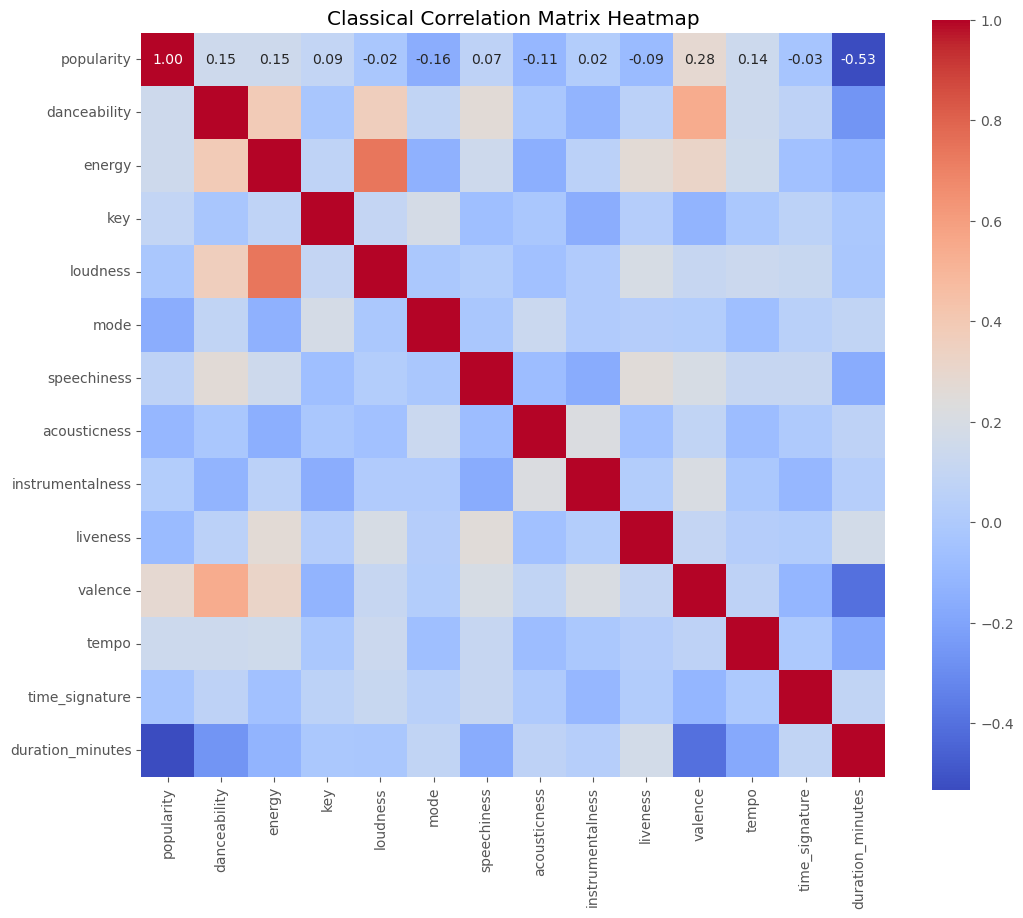

In [12]:
# Plot heatmap

# Create a new figure with a specified size (12 inches wide and 10 inches tall)
fig = plt.figure(figsize=(12, 10))

# Get the current Axes instance of the figure
ax = fig.gca()

# Plot the heatmap using seaborn's heatmap function
# correlation_matrix: the data to be plotted, assumed to be a correlation matrix
# annot=True: annotate each cell with the numeric value
# fmt=".2f": format for annotations, displaying two decimal places
# cmap='coolwarm': color map for the heatmap (cool to warm colors)
# ax=ax: plot the heatmap on the specified Axes instance
# annot_kws={"size": 10}: set the font size of the annotations to 10
# square=True: ensure the aspect ratio of the plot is square
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, annot_kws={"size": 10}, square=True)

# Add a title to the plot
plt.title('Classical Correlation Matrix Heatmap')

# Display the plot
plt.show()

In [13]:
# Create dummy variables for specified values in 'Artists'
key_name_dummies = pd.get_dummies(df_unique['Artists'], prefix='', prefix_sep='', columns=['Antonio Vivaldi',
                                                                                           'Johann Sebastian Bach',
                                                                                           'Wolfgang Amadeus Mozart',
                                                                                           'Ludwig van Beethoven'], dtype='int')

# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df_unique, key_name_dummies], axis=1)

df_encoded.shape





(206, 31)

# LR

In [14]:
import sklearn as skl
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Feature matrix and target vector respectively
X = df_encoded.select_dtypes(['float', 'int'])
y = df_encoded['popularity']

X = X.drop(columns=['popularity'])

# popularity is gone 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   danceability             206 non-null    float64
 1   energy                   206 non-null    float64
 2   key                      206 non-null    int64  
 3   loudness                 206 non-null    float64
 4   mode                     206 non-null    int64  
 5   speechiness              206 non-null    float64
 6   acousticness             206 non-null    float64
 7   instrumentalness         206 non-null    float64
 8   liveness                 206 non-null    float64
 9   valence                  206 non-null    float64
 10  tempo                    206 non-null    float64
 11  time_signature           206 non-null    int64  
 12  Release Day              206 non-null    int32  
 13  Release Month            206 non-null    int32  
 14  Release Year             2

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of alpha values to try for Lasso and Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Store results
results = []

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_pred = linear_reg.predict(X_test_scaled)
linear_r2 = r2_score(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mape = np.mean(np.abs((y_test - linear_pred) / y_test)) * 100

results.append({
    'Model': 'Linear Regression',
    'R2 Score': linear_r2,
    'MSE': linear_mse,
    'MAPE': linear_mape
})

# Lasso Regression
for alpha in alpha_values:
    lasso = Lasso(alpha=0.1, max_iter=1000, random_state=42) 
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_r2 = r2_score(y_test, lasso_pred)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

    results.append({
        'Model': f'Lasso (alpha={alpha})',
        'R2 Score': lasso_r2,
        'MSE': lasso_mse,
        'MAPE': lasso_mape
    })

# Ridge Regression
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_r2 = r2_score(y_test, ridge_pred)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mape = np.mean(np.abs((y_test - ridge_pred) / y_test)) * 100
    
    results.append({
        'Model': f'Ridge (alpha={alpha})',
        'R2 Score': ridge_r2,
        'MSE': ridge_mse,
        'MAPE': ridge_mape
    })


In [16]:
# Convert results to DataFrame for easier visualization
results_classical_df_one = pd.DataFrame(results)

# Print results
print(results_classical_df_one)

                  Model  R2 Score        MSE  MAPE
0     Linear Regression  0.757089  80.852687   inf
1   Lasso (alpha=0.001)  0.764406  78.417295   inf
2    Lasso (alpha=0.01)  0.764406  78.417295   inf
3     Lasso (alpha=0.1)  0.764406  78.417295   inf
4       Lasso (alpha=1)  0.764406  78.417295   inf
5      Lasso (alpha=10)  0.764406  78.417295   inf
6     Lasso (alpha=100)  0.764406  78.417295   inf
7   Ridge (alpha=0.001)  0.757090  80.852376   inf
8    Ridge (alpha=0.01)  0.757098  80.849584   inf
9     Ridge (alpha=0.1)  0.757182  80.821655   inf
10      Ridge (alpha=1)  0.758022  80.542106   inf
11     Ridge (alpha=10)  0.765852  77.935980   inf
12    Ridge (alpha=100)  0.783542  72.047622   inf


# Lasso

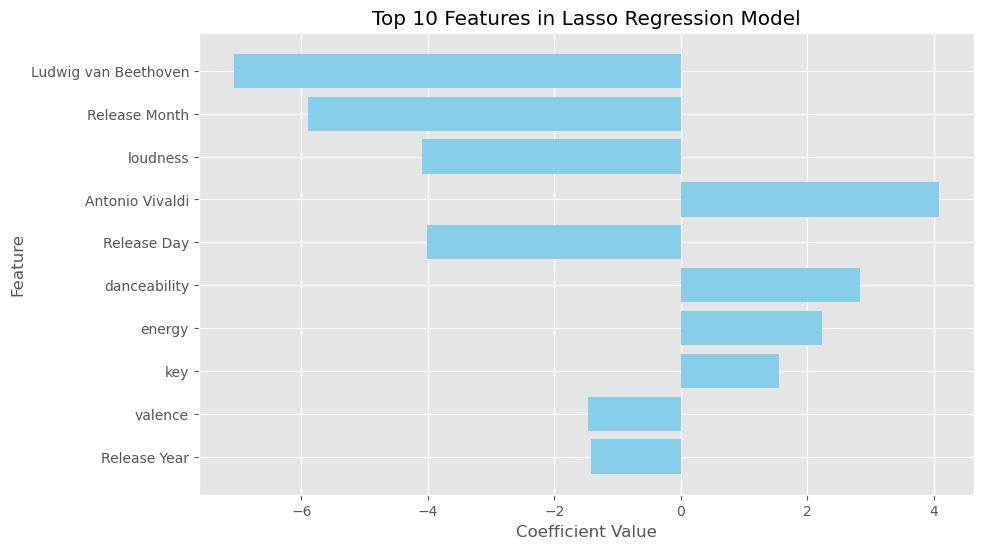

Test Score: 0.7644055418457775
MSE Score: 78.41729485995522


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

# Ridge

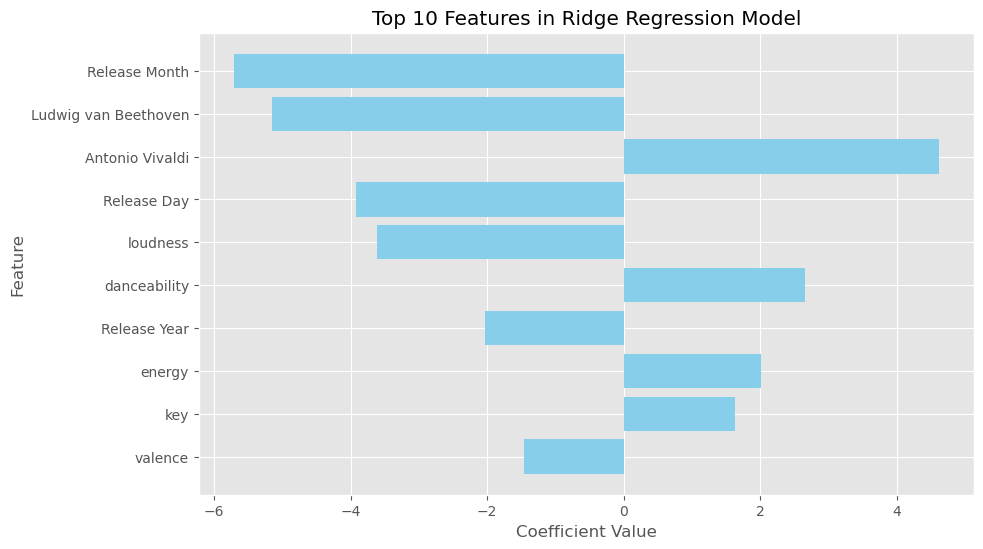

Test Score: 0.7658515891779957
MSE Score: 77.93597997283773


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['ridge'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)